# Housing Prices Project (module 70)

## Business Questions

classification task (predicting whether a house is expensive or not)

and later move on to the regression task (predicting the exact price).


## Workflow
- understand the context
- explore and clean the data
- data preprocessing
- modelling
- debugging
- implement solution

## rem
Unit of measurement is feet


## Understanding Housing
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

TotalBsmtSF: Total square feet of basement area

BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)

Fireplaces: Number of fireplaces

PoolArea: Pool area in square feet

GarageCars: Size of garage in car capacity

WoodDeckSF: Wood deck area in square feet

ScreenPorch: Screen porch area in square feet

# Imports and Settings

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
# import data
data = pd.read_table("data/housing_iteration_0_2_classification.csv", sep=",")

# Preprocessing

## Exploratory Data Analysis (EDA)
Check data types, duplicates and missing values; visualize the features (feel free to use Tableau) and get a general sense of what the dataset contains.

In [3]:
data.columns

Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'Expensive'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   TotalBsmtSF   1460 non-null   int64  
 3   BedroomAbvGr  1460 non-null   int64  
 4   Fireplaces    1460 non-null   int64  
 5   PoolArea      1460 non-null   int64  
 6   GarageCars    1460 non-null   int64  
 7   WoodDeckSF    1460 non-null   int64  
 8   ScreenPorch   1460 non-null   int64  
 9   Expensive     1460 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 114.2 KB


In [5]:
data.describe()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,70.049958,1057.429452,2.866438,0.613014,2.758904,1.767123,94.244521,15.060959,0.148630
std,9981.264932,24.284752,438.705324,0.815778,0.644666,40.177307,0.747315,125.338794,55.757415,0.355845
min,1300.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7553.500000,59.000000,795.750000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,9478.500000,69.000000,991.500000,3.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000
75%,11601.500000,80.000000,1298.250000,3.000000,1.000000,0.000000,2.000000,168.000000,0.000000,0.000000
max,215245.000000,313.000000,6110.000000,8.000000,3.000000,738.000000,4.000000,857.000000,480.000000,1.000000


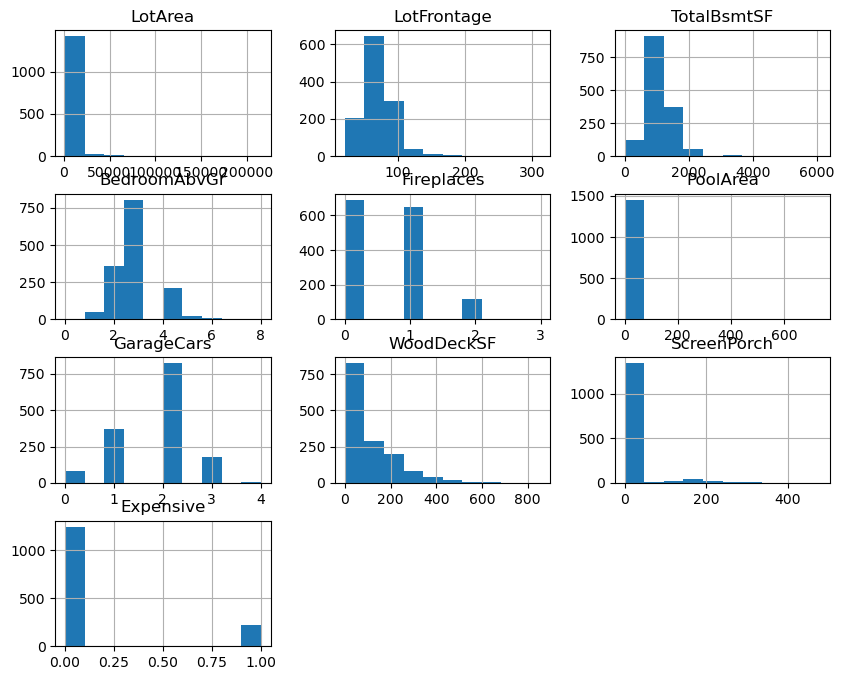

In [6]:
data.hist(figsize=(10, 8));

In [7]:
# column correlation
data.corr()["Expensive"].sort_values(ascending=False)
# Brett: "correlation does not equal causation". Still interesting ;)

Expensive       1.000000
TotalBsmtSF     0.467167
GarageCars      0.460152
Fireplaces      0.343523
LotFrontage     0.269355
WoodDeckSF      0.259138
LotArea         0.207233
BedroomAbvGr    0.075514
ScreenPorch     0.069669
PoolArea        0.033286
Name: Expensive, dtype: float64

In [8]:
# 'LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces', 'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'Expensive'
data = data.drop(["BedroomAbvGr", "ScreenPorch", "PoolArea"], axis=1)
data.head(2)

,LotArea,LotFrontage,TotalBsmtSF,Fireplaces,GarageCars,WoodDeckSF,Expensive
0,8450,65.0,856,0,2,0,0
1,9600,80.0,1262,1,2,298,0


## Defining X and y

In [9]:
y = data.pop("Expensive")
# .tolist()
X = data
X.head(2)    # after .pop data has lost the y feature

,LotArea,LotFrontage,TotalBsmtSF,Fireplaces,GarageCars,WoodDeckSF
0,8450,65.0,856,0,2,0
1,9600,80.0,1262,1,2,298


## Only Numerical Data

In [10]:
# X = data.drop(columns=["PassengerId", "Name", "Ticket"])
# another option: X_num = X.drop(columns=["Sex", "Cabin", "Embarked"])
# X_num = X.select_dtypes(include="number")

## Data Splitting (train & test)

In [11]:
# -----------> INPUTS  <------------
seed = 777
split = 0.2 # portion of the test sample of the whole dataset

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=seed)

In [13]:
X_train.head(4)

,LotArea,LotFrontage,TotalBsmtSF,Fireplaces,GarageCars,WoodDeckSF
833,10004,100.0,1516,0,2,0
195,2280,24.0,855,1,2,87
1395,12665,88.0,1094,1,3,144
1391,8944,65.0,1584,0,3,0


In [14]:
y_train

833     0
195     0
1395    1
1391    0
44      0
       ..
639     1
71      0
934     0
815     0
103     0
Name: Expensive, Length: 1168, dtype: int64

In [15]:
X_test.head(4)

,LotArea,LotFrontage,TotalBsmtSF,Fireplaces,GarageCars,WoodDeckSF
563,21780,66.0,1163,1,2,72
506,9554,80.0,777,1,2,182
655,1680,21.0,525,0,1,0
714,13517,NaN,725,0,2,0


In [16]:
y_test

563     0
506     0
655     0
714     0
332     1
       ..
878     0
465     0
1080    0
562     0
147     0
Name: Expensive, Length: 292, dtype: int64

In [17]:
y_train.value_counts()

Expensive
0    986
1    182
Name: count, dtype: int64

In [18]:
len(y_train)

1168

In [19]:
len(y_test)

292

## Data Cleaning

In [20]:
# check for duplicates
duplicates = X_train.duplicated()
duplicated_rows = X_train[duplicates]
duplicated_rows

# drop duplicates(inplace=True)

,LotArea,LotFrontage,TotalBsmtSF,Fireplaces,GarageCars,WoodDeckSF
646,7200,60.0,0,0,2,0
90,7200,60.0,0,0,2,0
1412,7200,60.0,0,0,2,0
180,2117,NaN,756,1,2,0
430,1680,21.0,483,0,1,0
1088,2522,24.0,970,0,2,0
837,1680,21.0,483,0,1,0
472,3675,35.0,547,0,2,0
102,7018,64.0,0,0,2,0


In [21]:
X_train.isna().sum()

LotArea          0
LotFrontage    211
TotalBsmtSF      0
Fireplaces       0
GarageCars       0
WoodDeckSF       0
dtype: int64

### NaNs with Simple Imputer
- Import it from the proper submodule (in this case, impute).
- Initialize it with the desired parameters.
- Fit them using the fit method on the train data.
- Transform the training and the testing sets with the transform method.

In [22]:
# Import it from the proper submodule (in this case, impute).
# from sklearn.impute import SimpleImputer

In [23]:
# Initialize it with the desired parameters.
imp = SimpleImputer().set_output(transform='pandas')

In [24]:
# Fit them using the fit method on the train data.
imp.fit(X_train)

SimpleImputer()

In [25]:
# Transform the training and the testing sets with the transform method.
X_imp_train = imp.transform(X_train)

In [26]:
# check result
X_imp_train.isnull().sum()

LotArea        0
LotFrontage    0
TotalBsmtSF    0
Fireplaces     0
GarageCars     0
WoodDeckSF     0
dtype: int64

# Modelling (Taining the Model)

## Initiate Model

In [27]:
X_train.columns

Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'Fireplaces', 'GarageCars',
       'WoodDeckSF'],
      dtype='object')

In [28]:
# 1. import the model
# from sklearn.tree import DecisionTreeClassifier

# 2. initialize the model (optional: give some parameters) ...and with prunding methods
# DTC = DecisionTreeClassifier()
DTC = DecisionTreeClassifier(max_depth=3, random_state=777)          # max_depth parameter controls the maximum levels/depth of the decision tree
# DTC = DecisionTreeClassifier(min_samples_leaf=20, random_state=777)   # min_sample_leaf sets a minimum number of samples/values that a leaf node must have

# 3. fit the model to the train data
DTC.fit(X=X_imp_train, y=y_train)

DecisionTreeClassifier(max_depth=3, random_state=777)

I've now created and trained a Model named "DTC".

### Plotting Decision Tree

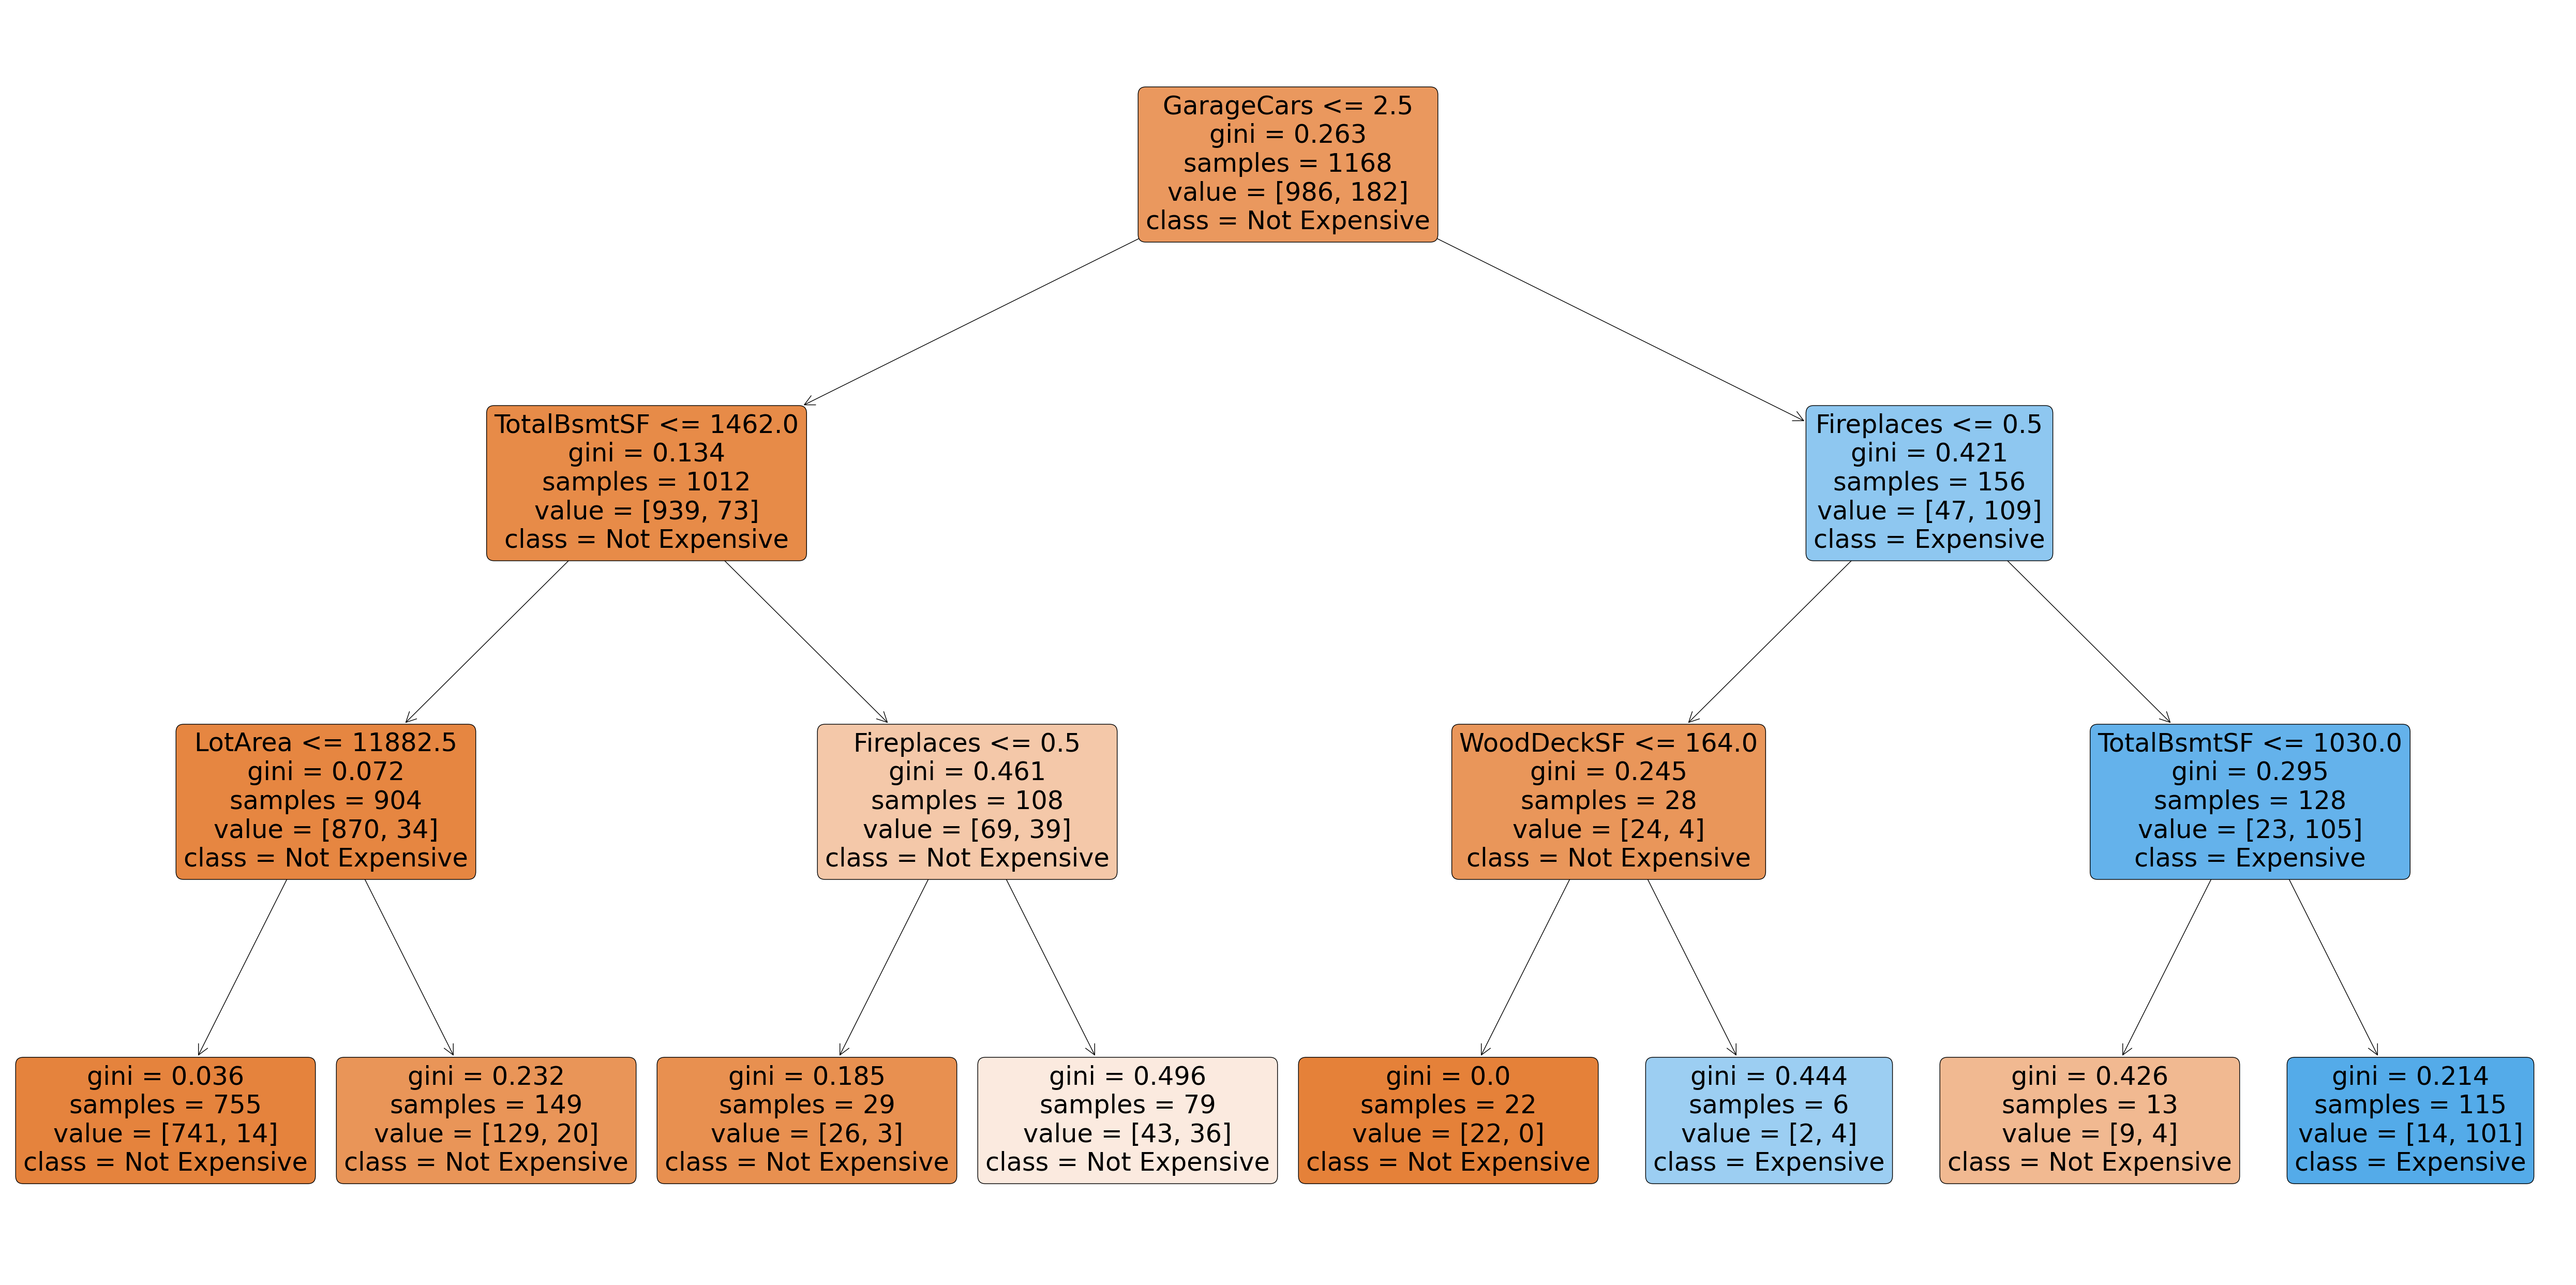

In [29]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(64, 32))

plot_tree(
     DTC,
     filled=True,
     rounded=True,
     class_names=['Not Expensive','Expensive'],
     feature_names=X_train.columns
     );

In [30]:
DTC.feature_names_in_

array(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'Fireplaces',
       'GarageCars', 'WoodDeckSF'], dtype=object)

In [31]:
DTC.feature_importances_

array([0.01984947, 0.        , 0.16565311, 0.1570415 , 0.63248342,
       0.02497251])

##  Make Train_Prediction

In [32]:
train_pred = DTC.predict(X_imp_train)

## Check Train_Accuracy

In [33]:
# from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_true = y_train,
               y_pred = train_pred
              )

# Evaluation (Testing the Model)

In [34]:
# for testing, the imputer must neither be initialized(.init) nor fitted (.fit)!!
X_test = imp.transform(X_test)
X_test.isnull().sum()

LotArea        0
LotFrontage    0
TotalBsmtSF    0
Fireplaces     0
GarageCars     0
WoodDeckSF     0
dtype: int64

## Test_Prediction

In [35]:
# with DTC Model
test_pred = DTC.predict(X_test)

## Test_Accuracy

In [36]:
# accuracy prediction
test_accuracy = accuracy_score(y_true = y_test,
                                 y_pred = test_pred
                                 )
round(test_accuracy, 2)

0.92

In [37]:
delta= train_accuracy - test_accuracy
print(train_accuracy, "---", test_accuracy, "---", delta)

0.9203767123287672 --- 0.9178082191780822 --- 0.0025684931506849695
